
# Proyecto: Dataset sobre cáncer

### 1. **Selección de mujeres representativas del conjunto de datos:**
Para seleccionar un subconjunto de mujeres representativas del universo total, puedes utilizar técnicas de **muestreo estratificado**. Esta técnica asegura que las proporciones de las clases (benigno y maligno) en el subconjunto sean las mismas que en el conjunto de datos original. Esto es importante para evitar sesgos en el modelo y garantizar que se entrene con una muestra representativa de ambas clases.

En términos prácticos, el muestreo estratificado garantiza que las mujeres con tumores benignos y malignos estén adecuadamente representadas en los datos de entrenamiento y prueba.

---

### 2. **Implementación del algoritmo de Curvas ROC y AUC:**
Las **Curvas ROC (Receiver Operating Characteristic)** y el **AUC (Area Under the Curve)** son herramientas clave para evaluar modelos de clasificación, especialmente cuando las clases están desbalanceadas. La curva ROC muestra la relación entre el TPR (True Positive Rate o tasa de verdaderos positivos) y el FPR (False Positive Rate o tasa de falsos positivos). A medida que el umbral de clasificación cambia, la curva ROC muestra cómo se comporta el modelo.

El **AUC** es el área bajo la curva ROC y proporciona una medida agregada del rendimiento del modelo. Un valor cercano a 1 indica un buen rendimiento, mientras que un valor cercano a 0.5 sugiere que el modelo no es mejor que un modelo aleatorio.

---
### 3. Preprocesamiento de Datos

---
### 4. Entrenamiento de Modelos de Clasificación
Se comparan los siguientes modelos:
- **Regresión Logística**
- **k-Vecinos Cercanos (k-NN)**
- **Máquinas de Soporte Vectorial (SVM)**

El modelo con mejor rendimiento es seleccionado para su uso.

---
### 5. Pruebas y Evaluación
Se realizan pruebas para verificar la precisión del modelo en la clasificación



# __Tarea 2:__ 

1. Nombre: Juan Luis   
1. Apellido: Fernández Abreu
1. Correo: juuanfz@gmail.com

In [45]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

/home/juanfernandez/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


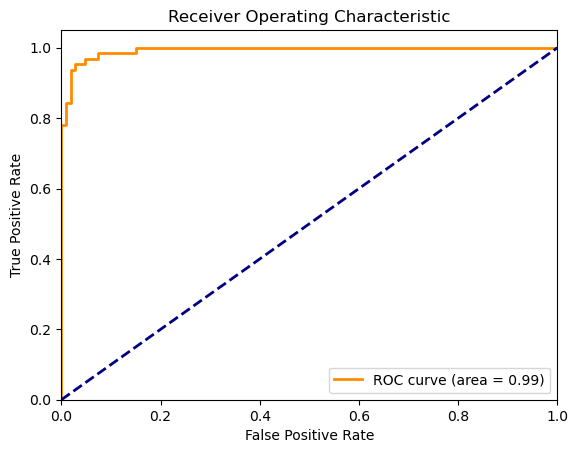

AUC: 0.99
F1-Score: 0.33


In [47]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dividir los datos usando muestreo estratificado
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in splitter.split(X, y):
    # Usar iloc para indexar el DataFrame
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Asegurar que y sea unidimensional usando .values y convertir a Series si es necesario
    y_train = y_train.values.flatten()
    y_test = y_test.values.flatten()

# Convertir las etiquetas de clase en formato binario (0 y 1)
y_train = pd.Series(y_train).map({'B': 0, 'M': 1})
y_test = pd.Series(y_test).map({'B': 0, 'M': 1})

# Inicializar y entrenar el modelo con un número mayor de iteraciones
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Hacer predicciones
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)



# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

f1 = f1_score(y_test, y_pred)

# Imprimir AUC y F1-Score
print(f"AUC: {roc_auc:.2f}")
print(f"F1-Score: {f1:.2f}")
